## Машинное обучение, ВШЭ

## Практическое задание 2

### Общая информация
Дата выдачи: 03.10.2019

Мягкий дедлайн: 23:59 MSK 13.10.2019

Жесткий дедлайн: 23:59 MSK 20.10.2019

### О задании

Задание состоит из двух частей: в **первой** части вы научитесь применять готовые модели из `sklearn` на данных и исследуете особенности разных видов регуляризации; во **второй** части вы реализуете собственный класс линейной регрессии для нестандартной функции потерь (включая процесс обучения) и исследуете скорость сходимости различных градиентных методов для этой модели.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) получат 0 за всю работу. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

In [1]:
import pandas as pd

#### Загрузите данные по ссылке:

In [2]:
# https://github.com/esokolov/ml-course-hse/blob/master/2018-fall/homeworks-practice/data/homework-practice-03-data.csv
df = pd.read_csv('data/homework-practice-03-data.csv')

## Линейная регрессия из коробки

По [ссылке1](https://www.kaggle.com/andyxie/beginner-scikit-learn-linear-regression-tutorial) и [ссылке2](https://stackabuse.com/linear-regression-in-python-with-scikit-learn/) доступен стандартный пример применения sklearn для решения задачи регрессии. Рекомендуем прочитать один из этих примеров, если вы раньше не работали с библиотекой sklearn.

#### 1. [0.5 балла] Разбейте выборку, загруженную в ячейке выше в переменную `df`, на обучающую и тестовую части в соотношении 8:2. Используйте функцию train_test_split из sklearn.

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

X = ['f0', 'f2', 'f3', 'f4', 'f5', 'f6']
Y = ['f1']

x_train, x_test, y_train, y_test = train_test_split(df[X], df[Y], test_size=0.2, random_state=238)

In [4]:
def nice_print(coef, intercept):
    print('\nКоэффициенты перед X_i, для i из промежутка [1, 6]:')
    for n, i in enumerate(coef):
        print(' {}: {:.10}'.format(n + 1, i))
    print('\nСвободный член:')
    print(' 0: {}'.format(intercept))

#### 2. [0.5 балла] В качестве целевой переменной для задачи регрессии будем использовать значения признака f1.  В качестве фичей используйте все остальные признаки и константу. Обучите, а затем провалидируйте на тестовых данных  следующие модели, используя в качестве метрики качества $R^2$ (r2_score в sklearn):
* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) (линейная регрессия с $L1$-регуляризатором) с коэффициентом регуляризации, равным 0.01.

Не забудьте отмасштабировать данные перед обучением моделей!

In [5]:
from sklearn.linear_model import Lasso

# Обучение
regLasso = Lasso(alpha=0.01, normalize=True, fit_intercept=True).fit(x_train, y_train)
regScore = regLasso.score(x_test, y_test)

# Получение R^2 статистики
print('R^2 cтатистика для Lasso регрессии с нормализацией:', '{:.4}'.format(regScore))

# Отображение полученных данных
nice_print(regLasso.coef_, regLasso.intercept_[0])

R^2 cтатистика для Lasso регрессии с нормализацией: 0.7074

Коэффициенты перед X_i, для i из промежутка [1, 6]:
 1: 0.08210768156
 2: -0.0
 3: 0.0
 4: 0.0
 5: 0.02631304963
 6: 0.0

Свободный член:
 0: 1.3102902971985178


In [6]:
from sklearn.linear_model import LinearRegression

# Обучение
reg = LinearRegression(fit_intercept=True, normalize=True).fit(x_train, y_train)
regScore = reg.score(x_test, y_test)

# Получение R^2 статистики
print('R^2 cтатистика для обычной регрессии без регуляризации:', '{:.4}'.format(regScore))

# Отображение полученных данных
nice_print(reg.coef_[0], reg.intercept_[0])

R^2 cтатистика для обычной регрессии без регуляризации: 0.7443

Коэффициенты перед X_i, для i из промежутка [1, 6]:
 1: 0.09686910261
 2: -0.003784517601
 3: 0.007702568084
 4: 0.2019145731
 5: 0.1507467886
 6: 1.285846161e-06

Свободный член:
 0: 0.792528083571006


#### 3. [1 балл] Изучите значения параметров получившихся моделей и сравните количество строго нулевых весов в них.

In [7]:
zerosLasso = sum([i == 0 for i in regLasso.coef_])
zerosLinear = sum([i[0] == 0 for i in reg.coef_])

print('{} - нулей в Лассо регрессии'.format(zerosLasso))
print('{} - нулей в регрессии без регуляризации'.format(zerosLinear))

4 - нулей в Лассо регрессии
0 - нулей в регрессии без регуляризации


#### 4. [1 балл] Нарисуйте попарные scatter plot для всех признаков в исходных данных (включая f1). Можно ли что-то сказать о связи признаков, веса которых были занулены методом Lasso, с целевой переменной? Используйте метод seaborn.pairplot.

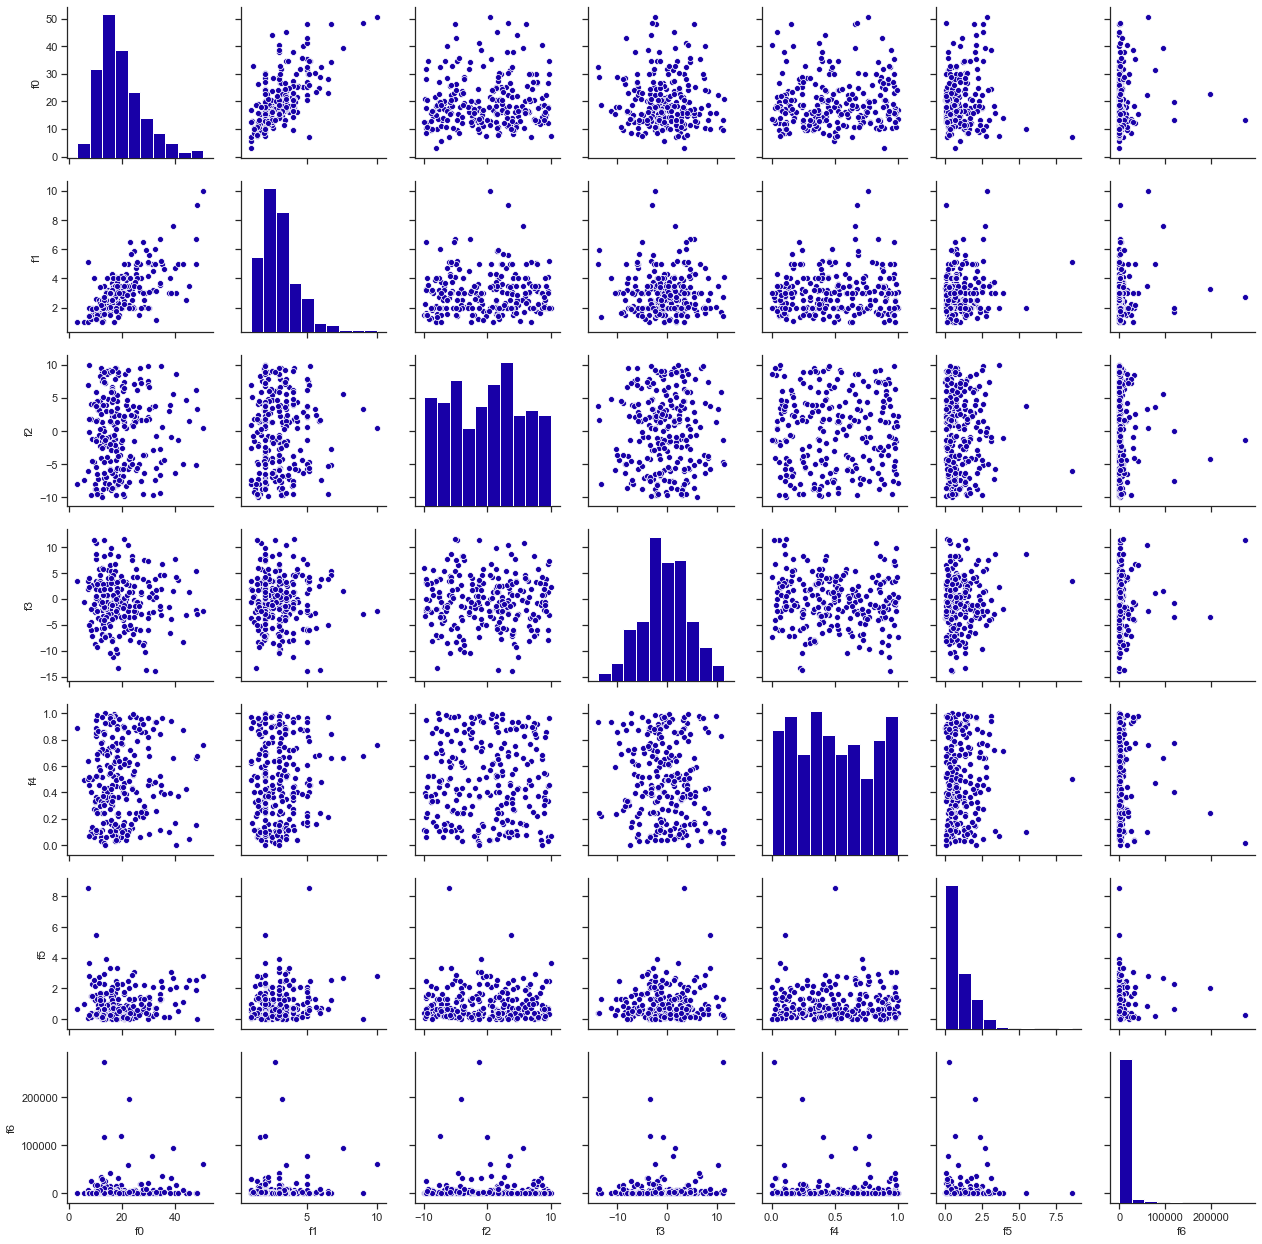

In [10]:
import seaborn as sns
sns.set(style="ticks", palette='nipy_spectral', color_codes=True)
g = sns.pairplot(df)

## Реализация градиентного спуска

#### 5. [4 балла] Реализуйте модель линейной регрессии для функции потерь Huber loss, обучаемую градиентным спуском:

$$
L_\delta(a,y)=
\begin{cases}
 \frac{1}{2}(y - a)^2,                   & |y - a| \le \delta, \\
 \delta\, |y - a| - \frac{1}{2}\delta^2 & \textrm{иначе.}
\end{cases}
$$

Все вычисления должны быть векторизованы, циклы средствами python допускается использовать только для итераций градиентного спуска. В качестве критерия останова необходимо использовать (одновременно):

* проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
* достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).

Необходимо написать реализацию стохастического градиентного спуска.

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту).

Инициализировать веса можно случайным образом или нулевым вектором. Ниже приведён шаблон класса, который должен содержать код реализации модели.

Обучать свободный коэффициент не нужно! Можно считать, что если он нам нужен, то в выборку добавлен константный признак.

In [11]:
def prepare_data(x_train, x_test, y_test, bias=False):
    
    x_tr_n = (x_train - x_train.min())/(x_train.max()-x_train.min())
    x_t_n = (x_test - x_test.min())/(x_test.max()-x_test.min())
    
    if not bias:
        validate = []
        validate.append(x_t_n)
        validate.append(y_test)
    else:
        x_tr_n['cons'] = np.ones([len(x_train), 1])
        x_t_n['cons'] = np.ones([len(x_test), 1])
        validate = []
        validate.append(x_t_n)
        validate.append(y_test)
    return (x_tr_n, x_t_n, validate)    

In [12]:
from sklearn.base import BaseEstimator

class HuberReg(BaseEstimator):
    def __init__(self, delta=1,
                 tolerance=1e-4, max_iter=10, w0=None, eta=1e-3, batch_size=1, print_every=50, validate=None):
        """
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        validate: list of len(list) = 2: список, содержащий данные для валидации (x_test, y_test)
        batch_size: int - mini-batch SGD
        """
        self.delta = delta
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.batch_size = batch_size
        self.validate = validate
        self.validate_history = []
        self.early_stop = False
        
    def weight_init_(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array (d, 1)
        """
        return np.random.random([X.shape[1], 1])
    
    def fit(self, X, y, print_every=None, loss_every=1, details=False):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        print_every: int or None - отвечает за периодичность вывода значений функции ошибок
        loss_every: int - отвечает за периодичность записи значений функции ошибок
        
        this method should use methods 
        self.calc_gradient(X, y) and self.calc_loss(X, y)
        ---
        output: self
        """
        from numpy import linalg as LA
        self.loss_history = []
        x_epoch, y_epoch = self.yield_data(X, y)
        
        
        # Проверка на наличие весов
        if self.w0 is None:
            self.w0 = self.weight_init_(X)
        
        # Проверка совпадения размерности весов с входными данными, если модель уже была обучена раннее
        elif self.w0.shape[0] != x_epoch.shape[1]:
            self.w0 = self.weight_init_(X)
            
        # Процесс обучения    
        for epoch in range(self.max_iter):
            
            # Считаем loss и записываем в список
            epoch_train_loss = self.huber_loss((X @ self.w0).values, y.values, self.delta)
            self.loss_history.append(epoch_train_loss)
            
            # Для каждого мини-батча из тренировочной выборки
            if not self.early_stop:
                for i in range(int(len(X) / self.batch_size)):

                    # Извлекаем подвыборку из нашей выборки
                    x_epoch, y_epoch = self.yield_data(X, y)
                    pred = x_epoch @ self.w0

                    # Обновляем веса
                    difference_between_w = self.eta * self.batch_size * np.expand_dims(np.array(self.calc_gradient(x_epoch, y_epoch)).mean(axis=0), 1)
                    self.w0 -= difference_between_w

                    # если градиент слишком маленький - прекращаем обучение
                    if LA.norm(difference_between_w) <= self.tolerance:
                        print('Ранняя остановка обучения. Градиент почти не изменился.')
                        self.early_stop = True
                        break

                # Если задан параметр, то выводим процесс обучения
                if print_every != None:
                    if epoch % print_every == 0:
                        print('{} итерация обучения. Величина ошибки: {:.5}'.format(epoch, epoch_train_loss))

                # Если на вход подан список с данными для валидации, то записываем лосс для валидационных данных
                if self.validate != None:
                    x_validate, y_validate = self.validate
                    epoch_test_loss = self.huber_loss((x_validate @ self.w0).values, y_validate.values, self.delta)
                    if epoch % loss_every == 0:
                        self.validate_history.append(epoch_test_loss)
            else:
                self.early_stop = False
                break
        if details:
            print('-' * 100)        
            print('Обучение завершено. Всего пройдено {} эпох.'.format(epoch + 1))
        return self
        
    
    def predict(self, X):
        """
        X: np.array of shape (l, d)
        
        output: y, np.array of shape (l)
        """
        if self.w0 is None:
            self.w0 = self.weight_init_(X)
        if self.w0.shape[0] != X.shape[1]:
            raise Exception('МОдель не обучена!')
        return X.dot(self.w0)
    
    def yield_data(self, X, y):
        '''
        output: random samples from x and y
        '''
        x_epoch = X.sample(self.batch_size)
        y_epoch = y.loc[x_epoch.index].values
        x_epoch = x_epoch.values
        return (x_epoch, y_epoch)
    
    def calc_gradient(self, x_epoch, y_epoch):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        pred = x_epoch @ self.w0
        
        # Получаем маску производных, которая будет распределять вектора по соответствующим градиентам
        mask = self.get_mask(y_epoch, pred, delta=self.delta)
        gradient_matrix = []
        
        # Каждому элементу маски присваем соответствующий градиент
        for n, i in enumerate(mask):
            if i == 1:
                grad = (y_epoch[n] - pred[n]) * x_epoch[n]
            elif i == 2:
                grad = -self.delta * x_epoch[n]
            elif i == 3:
                grad = self.delta * x_epoch[n]
                
            # Все градиенты складываем в матрицу градинтов
            gradient_matrix.append(grad)
        return gradient_matrix
    
    def get_mask(self, y, y_pred, delta):
        """
        1 - (y-a)*x
        2 - (-delta*x)
        3 - (delta*x)
        """
        return np.where(abs(y - y_pred) <= delta, 1,
                 np.where(y - y_pred >= 0, 2, 3))

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        y_pred = X @ self.w0
        loss = self.huber_loss(y_pred, y)
        return loss
    
    def huber_loss(self, y_pred, y, delta):
        # https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3
        huber_mse = 0.5 * (y - y_pred)** 2
        huber_mae = delta * (np.abs(y - y_pred) - 0.5 * delta)
        return np.where(np.abs(y - y_pred) <= delta, huber_mse, huber_mae).sum()

In [13]:
# Масштабируем данные
x_train_n, x_test_n, validate = prepare_data(x_train, x_test, y_test, bias=False)

# Инициализируем модель
model = HuberReg(max_iter=500, eta=1e-3, delta=1, batch_size=32, validate=validate, tolerance=1e-7)
model.fit(x_train_n, y_train, details=True)

# Валидация модели
from sklearn.metrics import r2_score
r2_without_bias = r2_score(y_test, model.predict(x_test_n))
print('\nПосле обучения статистика R^2 составила: {:.4}'.format(r2_without_bias))

----------------------------------------------------------------------------------------------------
Обучение завершено. Всего пройдено 500 эпох.

После обучения статистика R^2 составила: 0.4282


#### 6. [1.5 балла] Обучите и провалидируйте модель на тех же данных (добавив константный признак), сравните качество с предыдущими методами. Исследуйте влияние параметров `max_iter` на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

In [14]:
# Масштабируем данные
x_train_norm, x_test_norm, validate = prepare_data(x_train, x_test, y_test, bias=True)

# Инициализируем модель
model = HuberReg(max_iter=500, eta=1e-3, delta=1, batch_size=32, validate=validate)
model.fit(x_train_norm, y_train, details=True)

# Валидация модели
from sklearn.metrics import r2_score
r2_with_bias = r2_score(y_test, model.predict(x_test_norm))
print('\nПосле обучения статистика R^2 составила: {:.4}'.format(r2_with_bias))

----------------------------------------------------------------------------------------------------
Обучение завершено. Всего пройдено 500 эпох.

После обучения статистика R^2 составила: 0.5013


**Вывод:** видим, что R^2 увеличился при добавлении константного признака -> модель улучшилась.

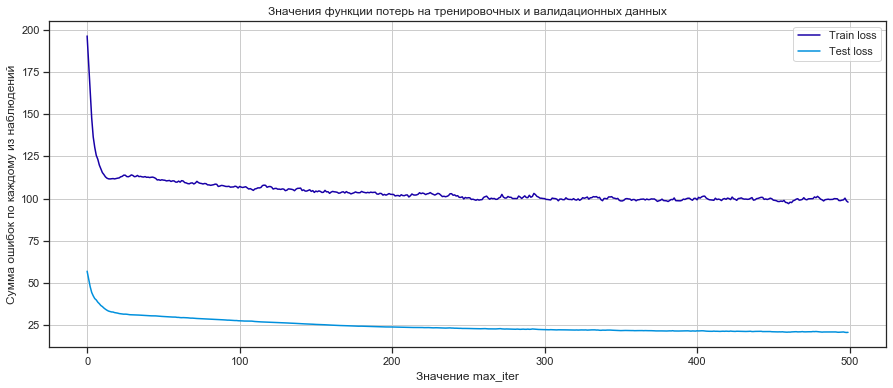

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 6))
plt.title('Значения функции потерь на тренировочных и валидационных данных')
plt.xlabel('Значение max_iter')
plt.ylabel('Сумма ошибок по каждому из наблюдений')
plt.grid(True)
plt.plot(model.loss_history, label='Train loss')
plt.plot(model.validate_history, label='Test loss')
plt.legend();

**Вывод:** чем больше количество итераций, тем меньше функция общих потерь, что соответствует ожиданиям. 

#### 7. [1.5 балла] Постройте график зависимости величины функции потерь от номера итерации для стохастического градиентного спусков с различным параметром `eta`. Сделайте выводы о стабильности сходимости метода в зависимости от `eta`.

Как делать красивые графики, можно посмотреть здесь: https://robjhyndman.com/hyndsight/graphics/

In [16]:
# Переберем все значения эта из некоторого промежутка
etas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

# Для каждого эта зафиксируем значения функции потерь во время обучения
losses = []
for eta in etas:
    # Для чистоты эксперимента веса обнулим перед каждым обучением
    model = HuberReg(max_iter=300, eta=eta, delta=1, batch_size=8, w0=np.zeros([7, 1]), tolerance=1e-7)
    model.fit(x_train_norm, y_train)
    losses.append(model.loss_history)

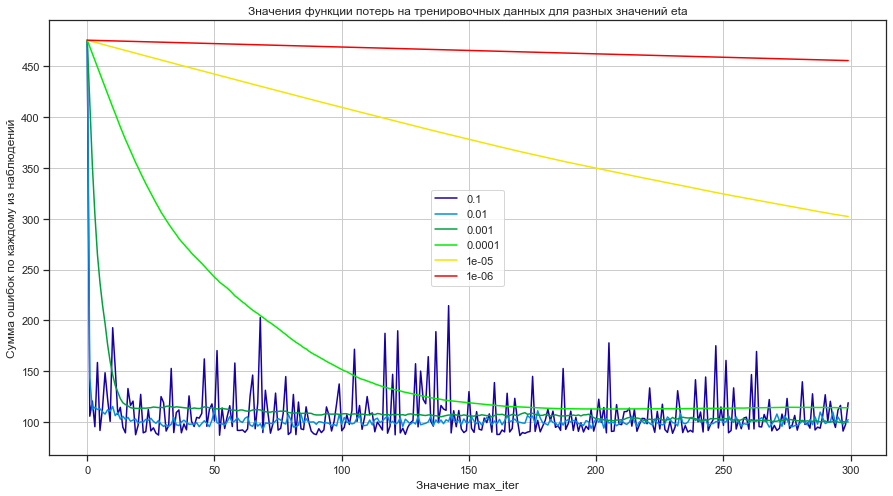

In [17]:
# Проилюстрируем полученные результаты
import matplotlib.pyplot as plt
x = np.arange(0, model.max_iter)
fig = plt.figure(figsize=(15, 8))
plt.grid()
plt.title('Значения функции потерь на тренировочных данных для разных значений eta')
plt.xlabel('Значение max_iter')
plt.ylabel('Сумма ошибок по каждому из наблюдений')
for i in range(len(etas)):
    plt.plot(x, losses[i], label=etas[i])
    plt.legend();


**Вывод:** при более маленьких значениях eta имеем более медленную, но более устойчивую сходимость.